# Load packages

In [2]:
# numerical calculation & data frames
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

# statistics
import statsmodels.api as sm

# pandas options
pd.set_option('mode.copy_on_write', True)  # pandas 2.0
pd.options.display.float_format = '{:.2f}'.format  # pd.reset_option('display.float_format')
pd.options.display.max_rows = 7  # max number of rows to display

# NumPy options
np.set_printoptions(precision = 2, suppress=True)  # suppress scientific notation

# For high resolution display
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

seaborn.objects(so.Plot)의 한글폰트 설정 방법을 못찾겠다 (도와주세요!)

# Titanic

## 1. 데이터 전처리

In [81]:
data=pd.read_csv("Titanic-Dataset.csv")

In [75]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [77]:
pd.set_option("display.max_rows", 30)
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [78]:
pd.reset_option("display.max_rows")

결측치가 있으니 이것들을 제거하겠다. <br>
하지만 전체 데이터가 1000개도 넘지 않은데 이것들을 다 지우는 것은 치명적이다. <br>
따라서 결측치를 제거하지 않겠다. <br>
나중에 age와 cabin을 사용할 때 유의하도록 하자. (cabin은 선실번호로 거의 안쓸듯)

## 2. 데이터 구성요소

- PassengerId	- 정수형	- 각 승객의 고유 식별 번호
- Survived	- 범주형	- 생존 여부 (0: 사망, 1: 생존)
- Pclass	- 범주형	- 좌석 등급 (1: 1등석, 2: 2등석, 3: 3등석)
- Name	- 문자열형	- 승객 이름
- Sex	- 범주형	- 승객 성별 (male, female)
- Age	- 실수형	- 승객 나이 (결측값 포함 가능)
- SibSp	- 정수형	- 함께 탑승한 형제/자매 또는 배우자 수
- Parch	- 정수형	- 함께 탑승한 부모/자녀 수
- Ticket	- 문자열형	- 티켓 번호
- Fare	- 실수형	- 티켓 요금
- Cabin	- 문자열형	- 선실 번호 (결측값이 많음)
- Embarked	- 범주형	- 탑승 항구 (C: Cherbourg, Q: Queenstown, S: Southampton)

### 2-1. 데이터 전체 비율

In [30]:
data["Age"].describe()

count   183.00
mean     35.67
std      15.64
min       0.92
25%      24.00
50%      36.00
75%      47.50
max      80.00
Name: Age, dtype: float64

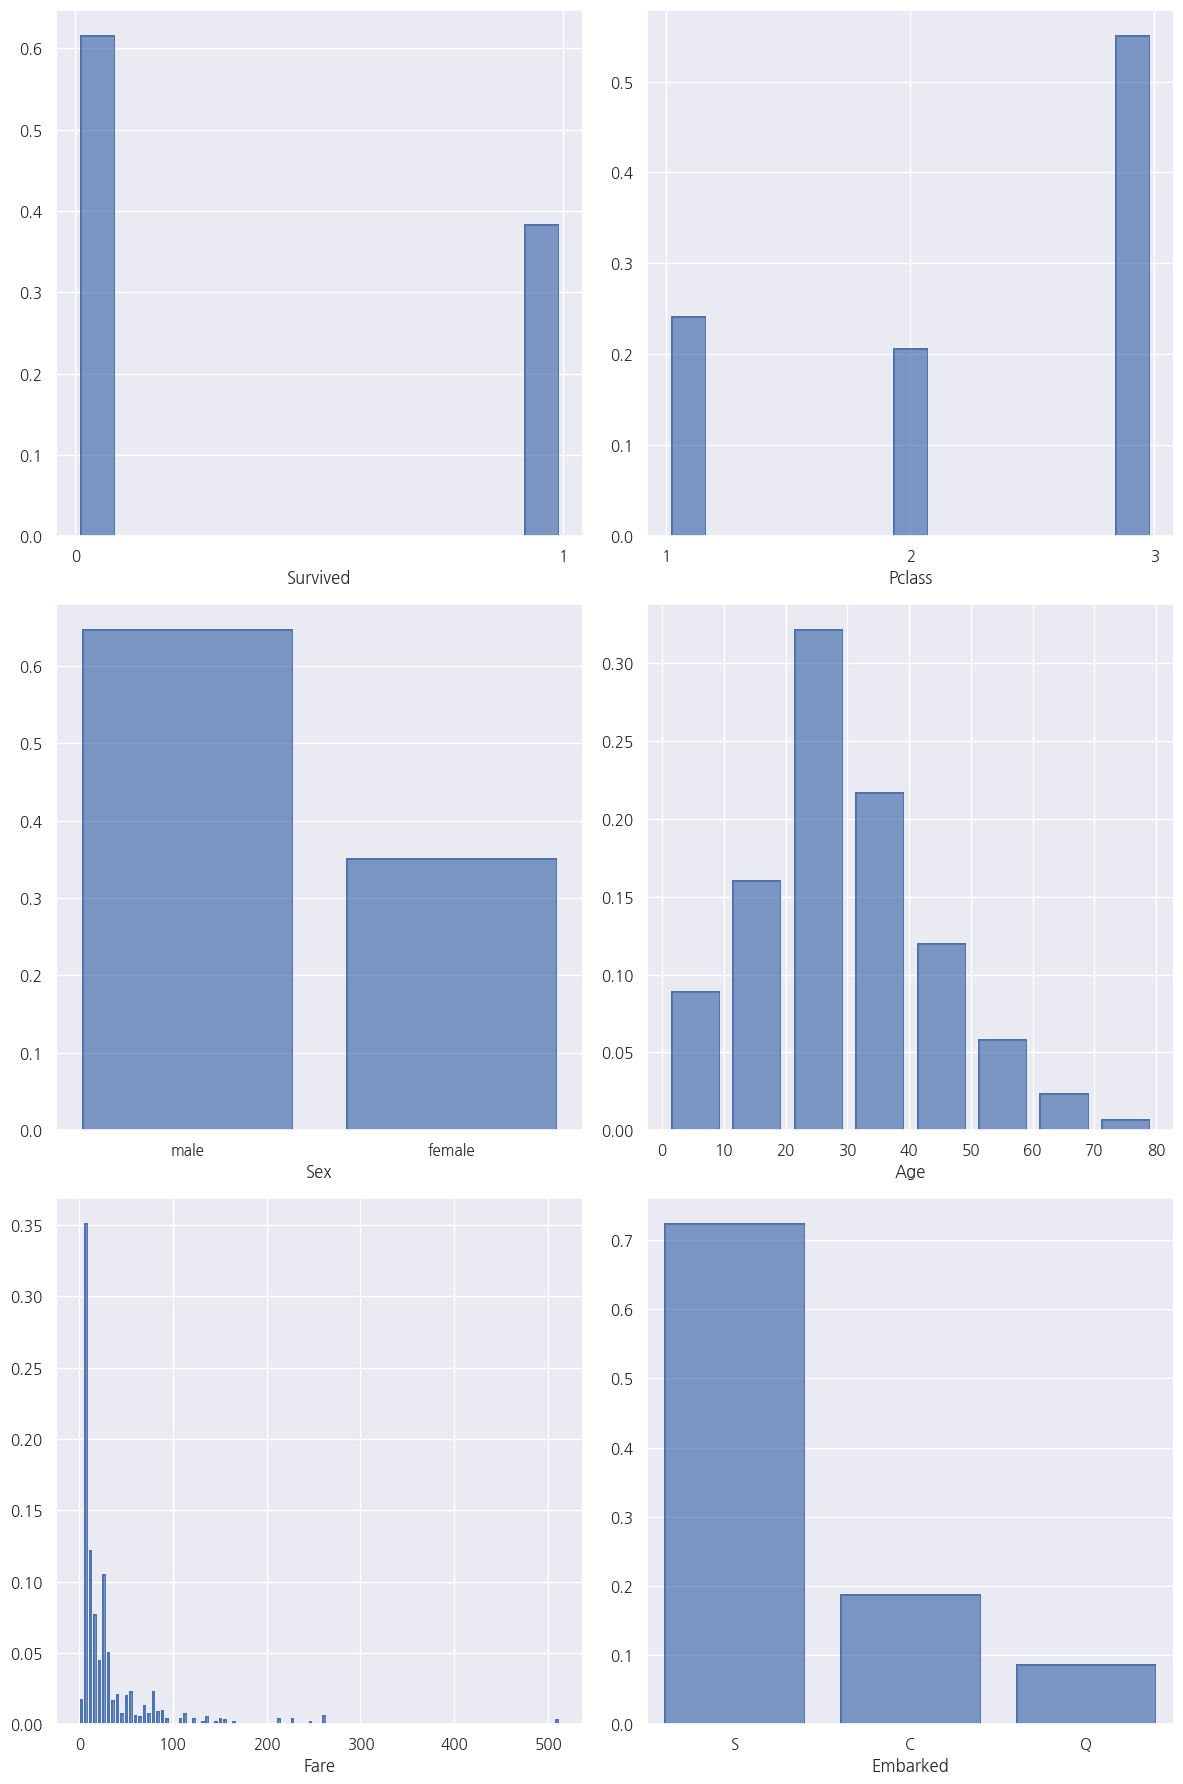

In [84]:
fig, axes = plt.subplots(3, 2, figsize=(12, 18))

(
    so.Plot(data, x="Survived")
    .add(so.Bar(), so.Hist("proportion"))
    .scale(x=so.Continuous().tick(at=[0,1]))
    .on(axes[0, 0])
    .plot()
)
(
    so.Plot(data, x="Pclass")
    .add(so.Bar(), so.Hist("proportion"))
    .scale(x=so.Continuous().tick(at=[1, 2, 3]))
    .on(axes[0, 1])
    .plot()
)
(
    so.Plot(data, x="Sex")
    .add(so.Bar(), so.Hist("proportion"))
    .on(axes[1, 0])
    .plot()
)
(
    so.Plot(data, x="Age")
    .add(so.Bar(), so.Hist("proportion", bins=8)) #최고 나이는 80세이다다
    .on(axes[1, 1])
    .plot()
)
(
    so.Plot(data, x="Fare")
    .add(so.Bar(), so.Hist("proportion"))
    .on(axes[2, 0])
    .plot()
)
(
    so.Plot(data, x="Embarked")
    .add(so.Bar(), so.Hist("proportion"))
    .on(axes[2, 1])
    .plot()
)
plt.tight_layout()
plt.show()

생존자, 좌석등급, 성별, 나이, 요금, 탑승 항구의 비율을 시각화 하였다.<br>
- 사망자가 생존자보다 약 두배 많다.
- 3등석인 사람이 약 절반을 차지한다.
- 남성이 여성의 두배 정도 된다.
- 탑승자 나이는 20대가 가장 많다.
- 요금은 저가가 가장 많다.
- Southampton 탑승객이 가장 많다.

### 2-2. 변수들간의 관계

#### 생존률과 객실등급

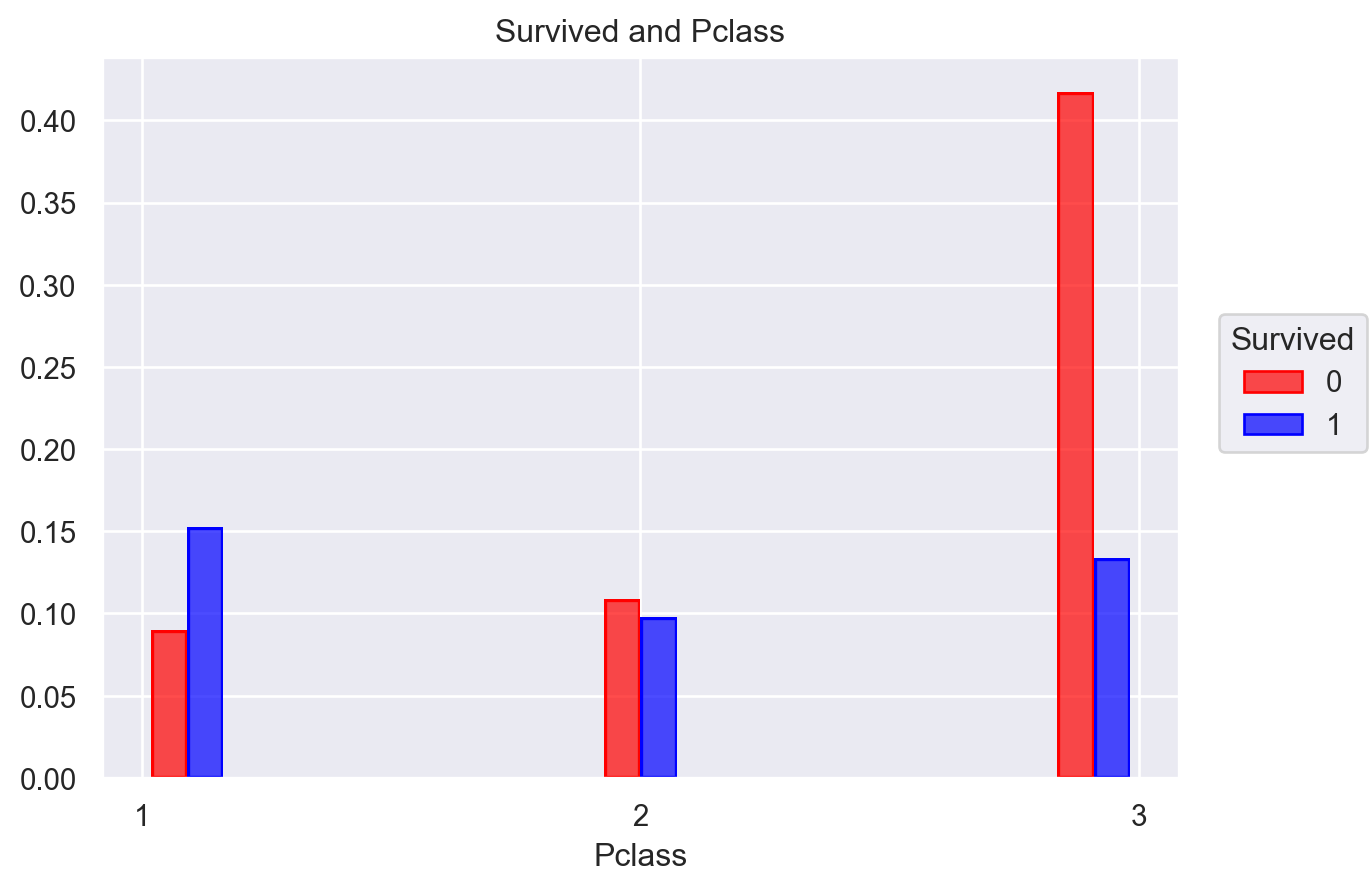

In [ ]:
(
    so.Plot(data, x="Pclass", color="Survived")
    .add(so.Bar(), so.Hist("proportion"), so.Dodge())
    .scale(x=so.Continuous().tick(at=[1, 2, 3]))
    .scale(color=["red", "blue"])
    .label(title="Survived and Pclass")
)

3등석에서 사망자의 비율이 압도적으로 높고, 생존자의 비율은 1등석이 제일 높다.<br>
1등석이 대피하기에 용이한 조건? 3등석은 배 하부에 위치해 있을 테니깐

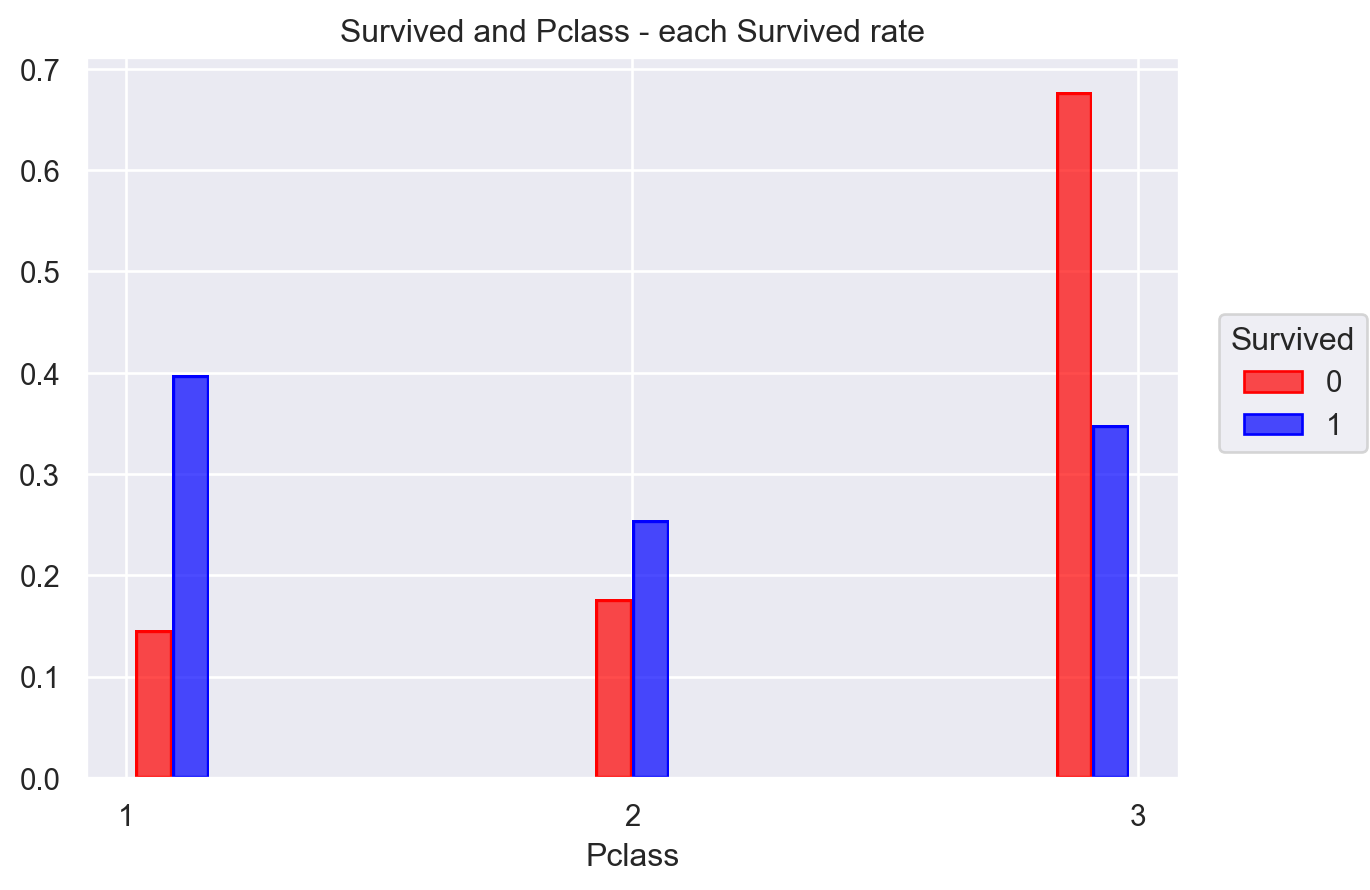

In [92]:
(
    so.Plot(data, x="Pclass", color="Survived")
    .add(so.Bar(), so.Hist("proportion", common_norm=False), so.Dodge())
    .scale(x=so.Continuous().tick(at=[1, 2, 3]))
    .scale(color=["red", "blue"])
    .label(title="Survived and Pclass - each Survived rate")
)

생존 유무별로 비율을 구분해보았다.<br>
생존자의 등급별 비율은 1등석, 3등석, 2등석 순이다. <br>
사망자의 등급별 비율은 3등석, 2등석, 1등석 순이다. <br>
사망자는 3등석에서 압도적으로 발생하였다.

#### 생존률과 성별

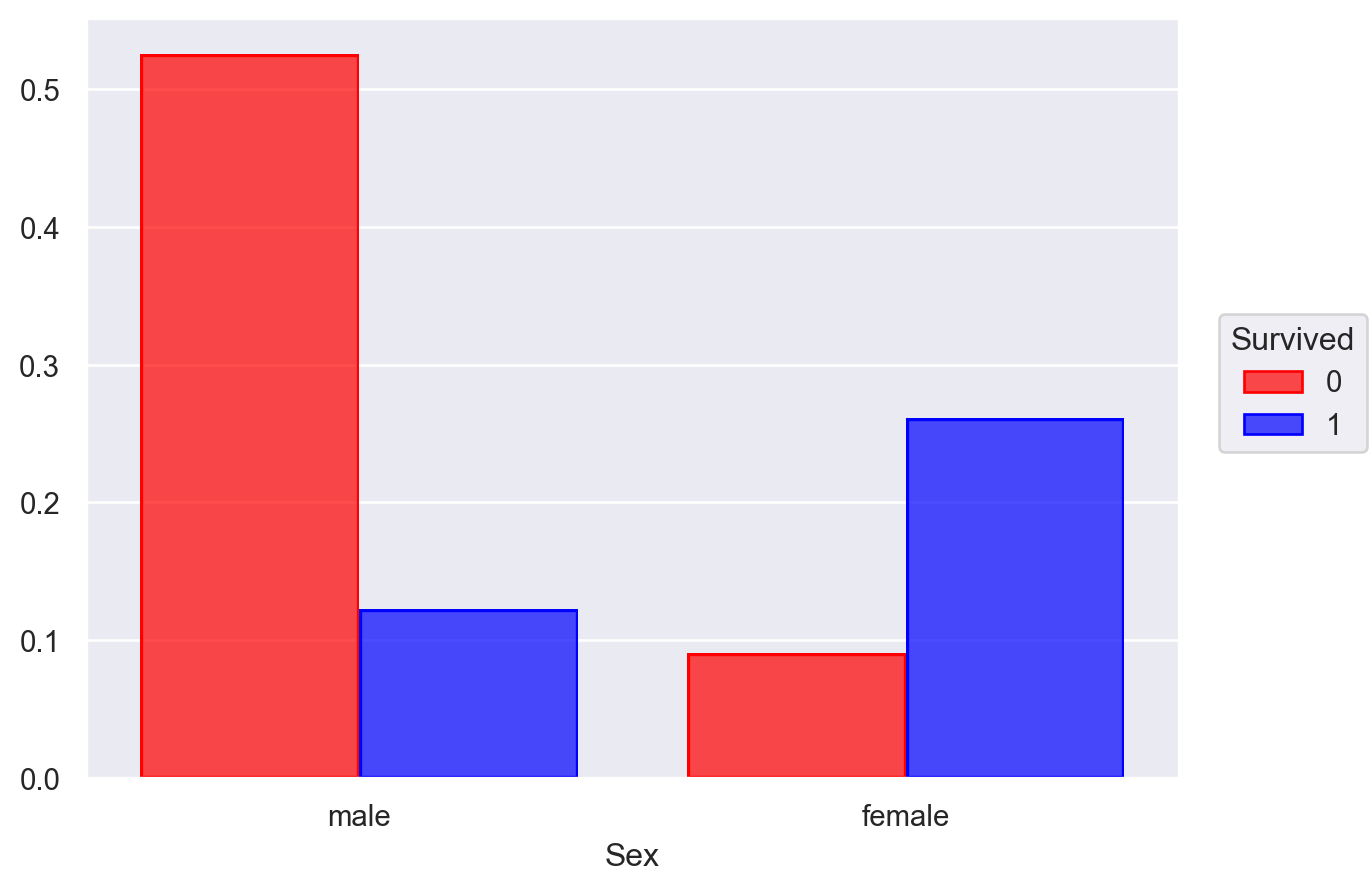

In [95]:
(
    so.Plot(data, x="Sex", color="Survived")
    .add(so.Bar(), so.Hist("proportion"), so.Dodge())
    .scale(color=["red", "blue"])
)

남성은 사망자가 생존자보다 압도적으로 많고, 여성의 경우는 그 반대이다 <br>
여성과 노약자 먼저? 아래의 그래프에서 추가적으로 확인해보자

#### 생존률과 나이

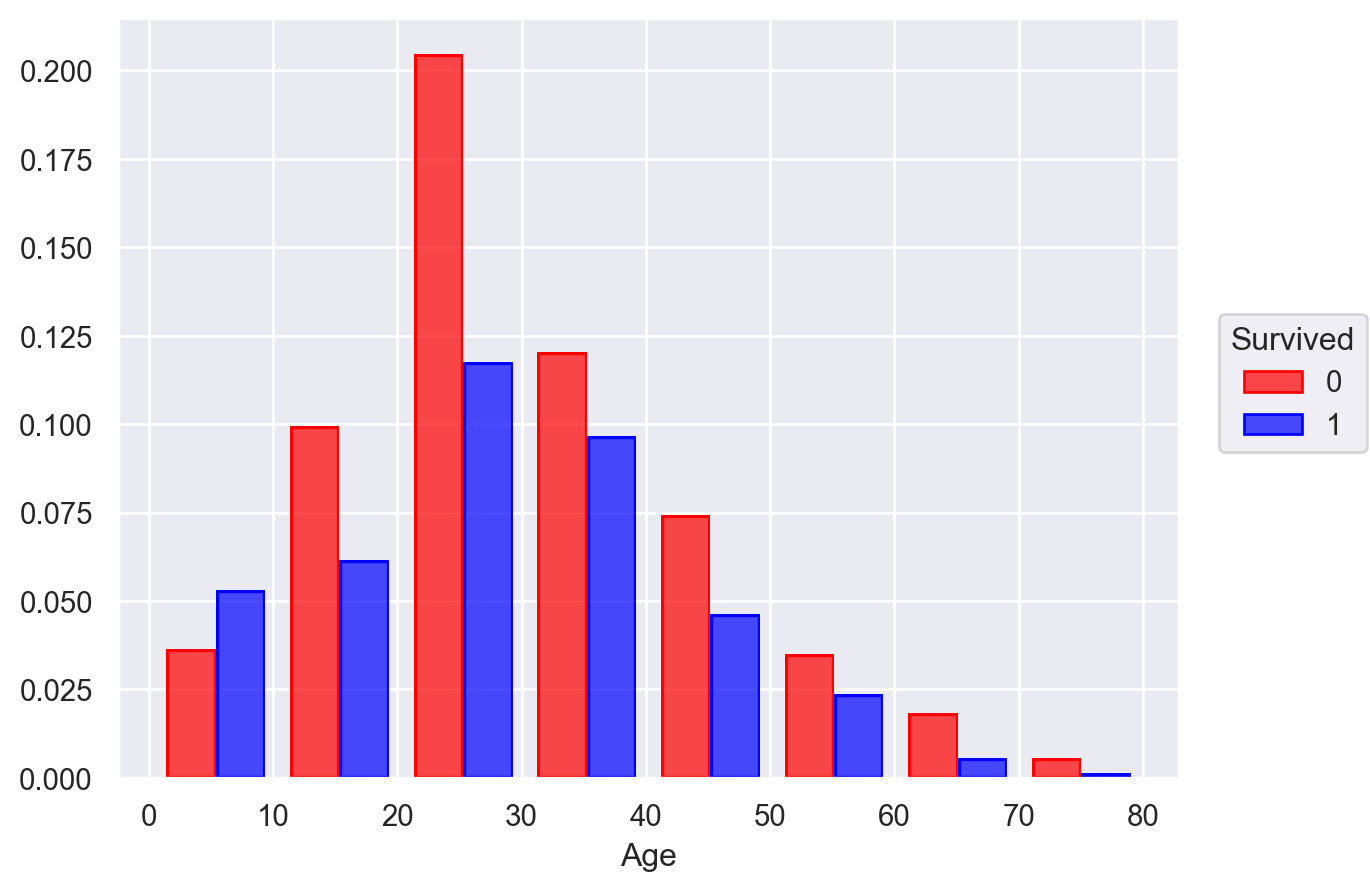

In [99]:
(
    so.Plot(data, x="Age", color="Survived")
    .add(so.Bar(), so.Hist("proportion", bins=8), so.Dodge())
    .scale(color=["red", "blue"])
)

사망자는 20대에서 가장 많이 나왔고, 생존자도 20대에서 가장 많았다. <br>
신기한 점은, 10살 이하에서만 생존률이 사망률보다 높다. <br>
노약자는 먼저 대피하라고 배려하지만, 노인들은 거동이 불편해서 그런가? 

#### 객실등급과 가격

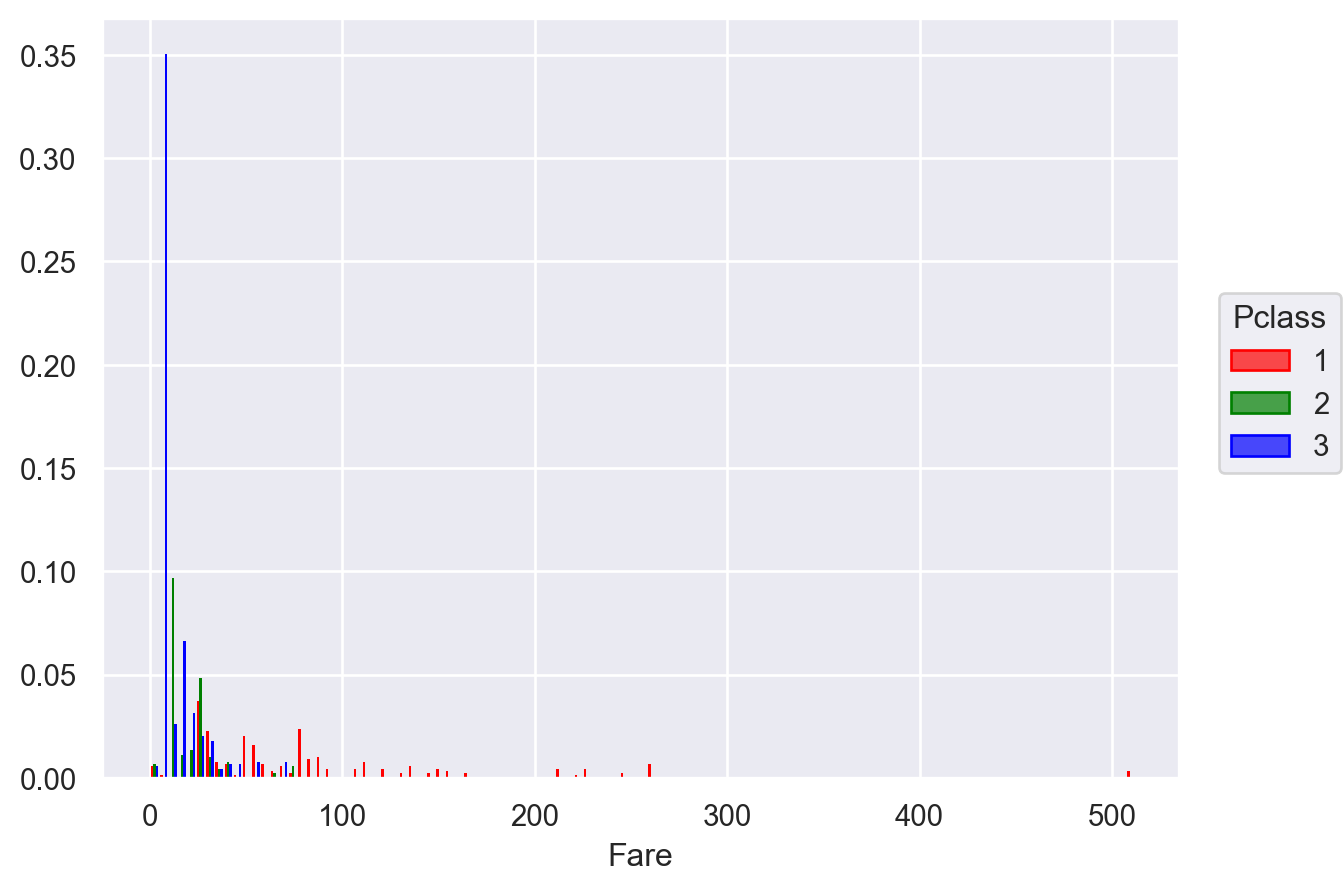

In [101]:
(
    so.Plot(data, x="Fare", color="Pclass")
    .add(so.Bar(), so.Hist("proportion"), so.Dodge())
    .scale(color=["red", "green", "blue"])
)

가격이 100이상인 것은 1등급밖에 없다.
<br> 500인것은 뭔데?? <br>
100이하인 것만 보자


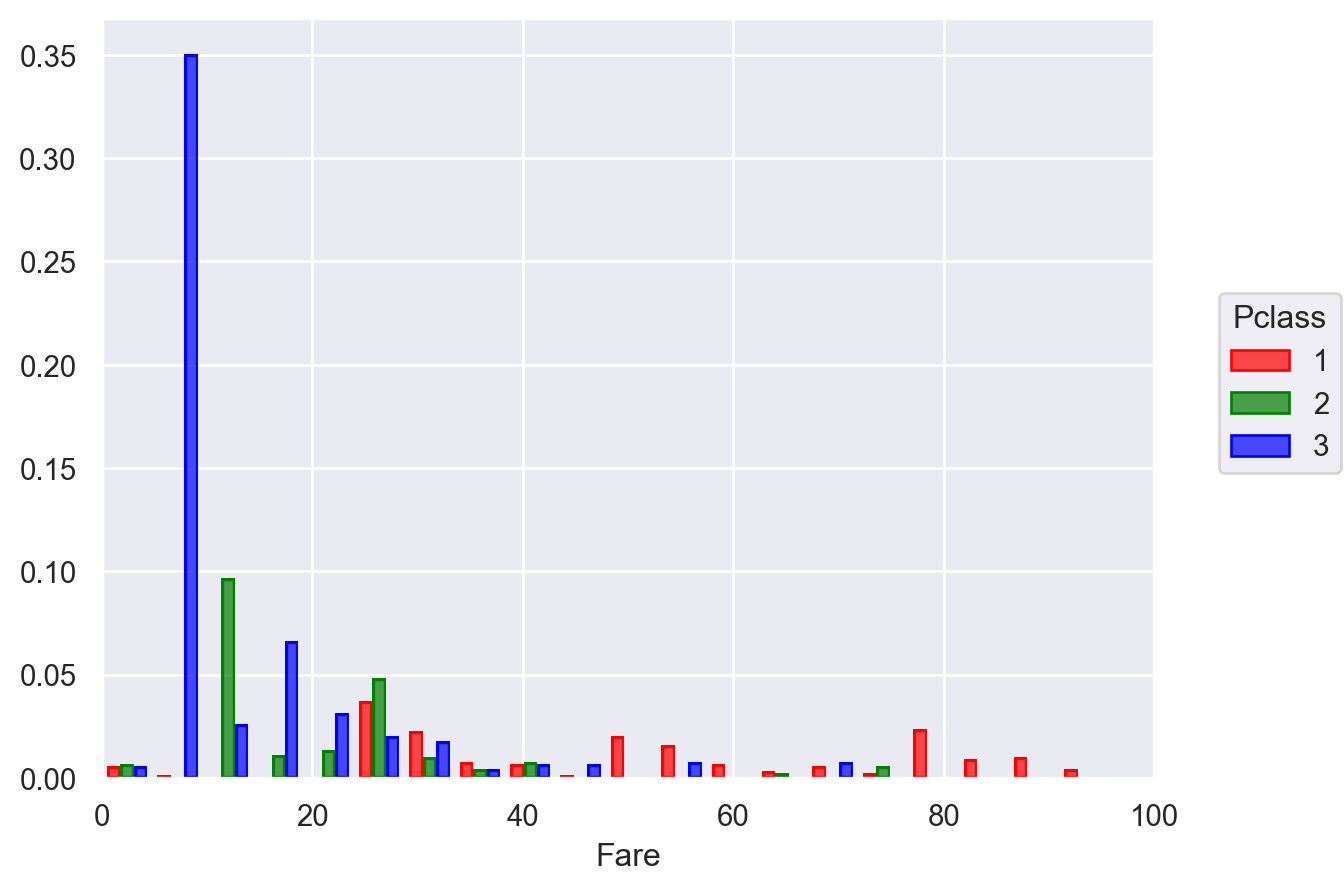

In [103]:
(
    so.Plot(data, x="Fare", color="Pclass")
    .add(so.Bar(), so.Hist("proportion"), so.Dodge())
    .scale(color=["red", "green", "blue"])
    .limit(x=(0, 100))
)

1등석인데 가격이 엄청 낮은것은 왜일까? 결측치? <br>
역시 3등석이 제일 낮은 가격에, 제일 많은 수가 존재한다. <br>
3등석과 가격이 비슷한 2등석도 있다. 3등석의 고급화일까? <br>
이를 통해 같은 등급의 선실이여도 그 급차이가 가격으로 나뉘어진다는 것을 알 수 있다. <br>
또는 나이대별로 가격이 달라질수도 있겠다.

#### 객실등급과 나이

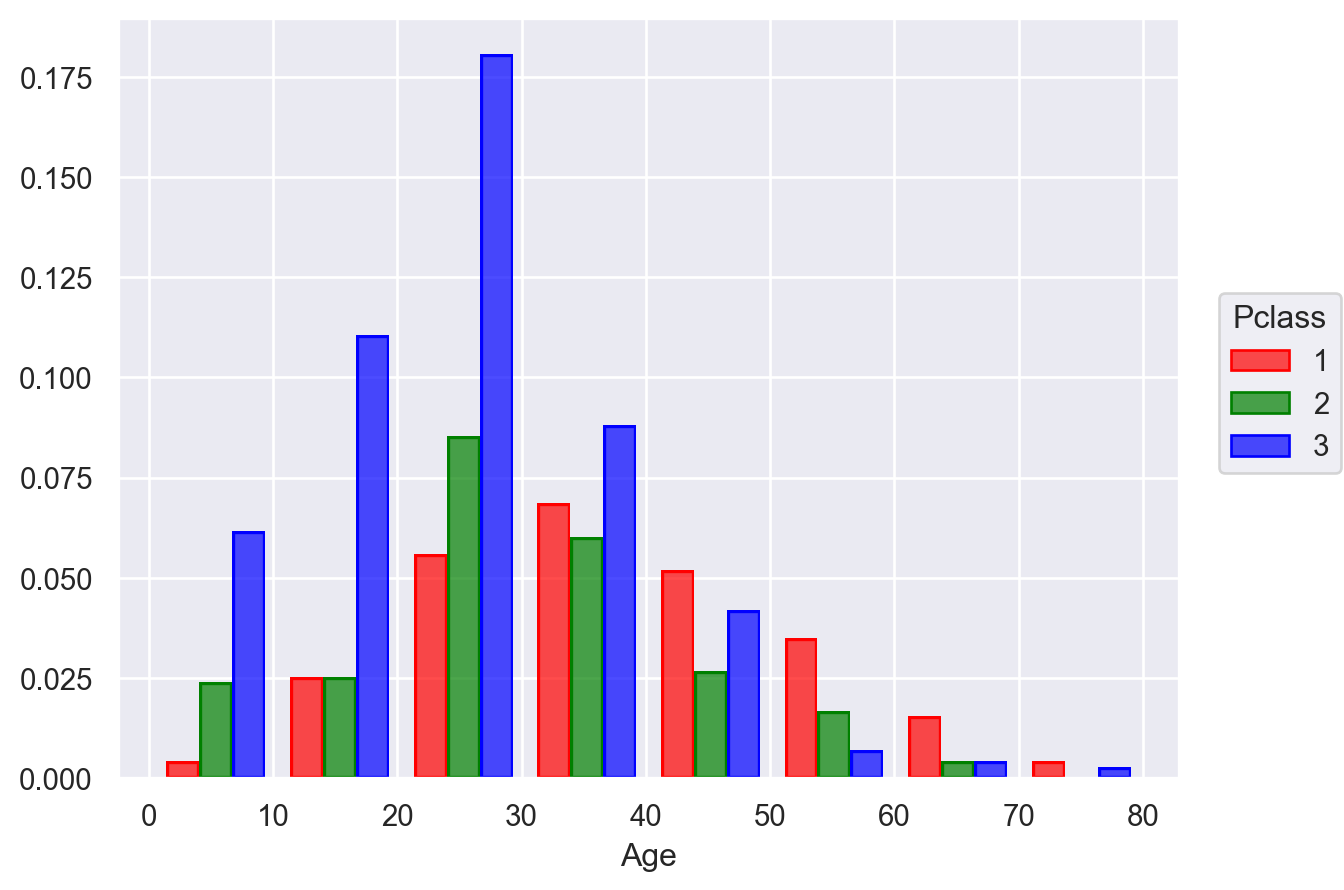

In [106]:
(
    so.Plot(data, x="Age", color="Pclass")
    .add(so.Bar(), so.Hist("proportion", bins=8), so.Dodge())
    .scale(color=["red", "green", "blue"])
)

나이가 젊을수록, 특히 20대가 3등석에 제일 많다. 
<br> 1등석은 30대가 가장 많다.
<br> 보통 나이가 많을수록 객실등급의 비율이 높아지는 추세이다.
<br> 나이랑 부의 상관관계가 뚜렷하다

#### 탑승항구와 좌석등급

그렇다면 항구별로 타는 사람도 달라질까?

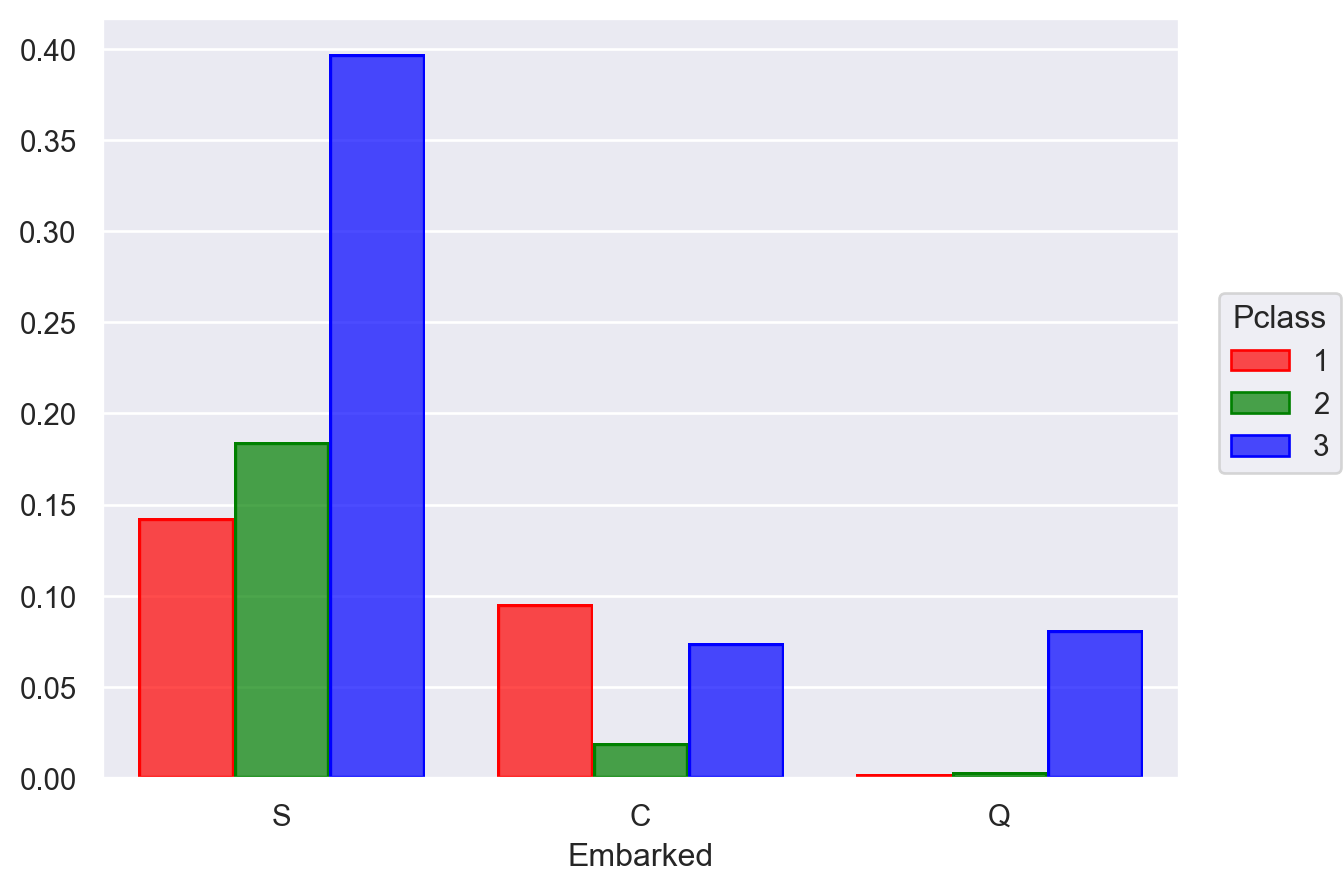

In [109]:
(
    so.Plot(data, x="Embarked", color="Pclass")
    .add(so.Bar(), so.Hist("proportion"), so.Dodge())
    .scale(color=["red", "green", "blue"])
)

진짜로 차이가 있다!
- (C: Cherbourg, Q: Queenstown, S: Southampton)
- 높은 등급의 선실을 이용할수록 부자라고 가정해보면
- Queenstown에는 부자가 거의 없다. 별로 못사는는 동네?
- Cherbourg는 Southampton보다 1등급과 2,3등급의 비율 차이가 더 크다. Southampton이 더 못사는 동네 또는 교통의 요충지라고 생각할 수 있다.


#### 나이와 티켓 요금

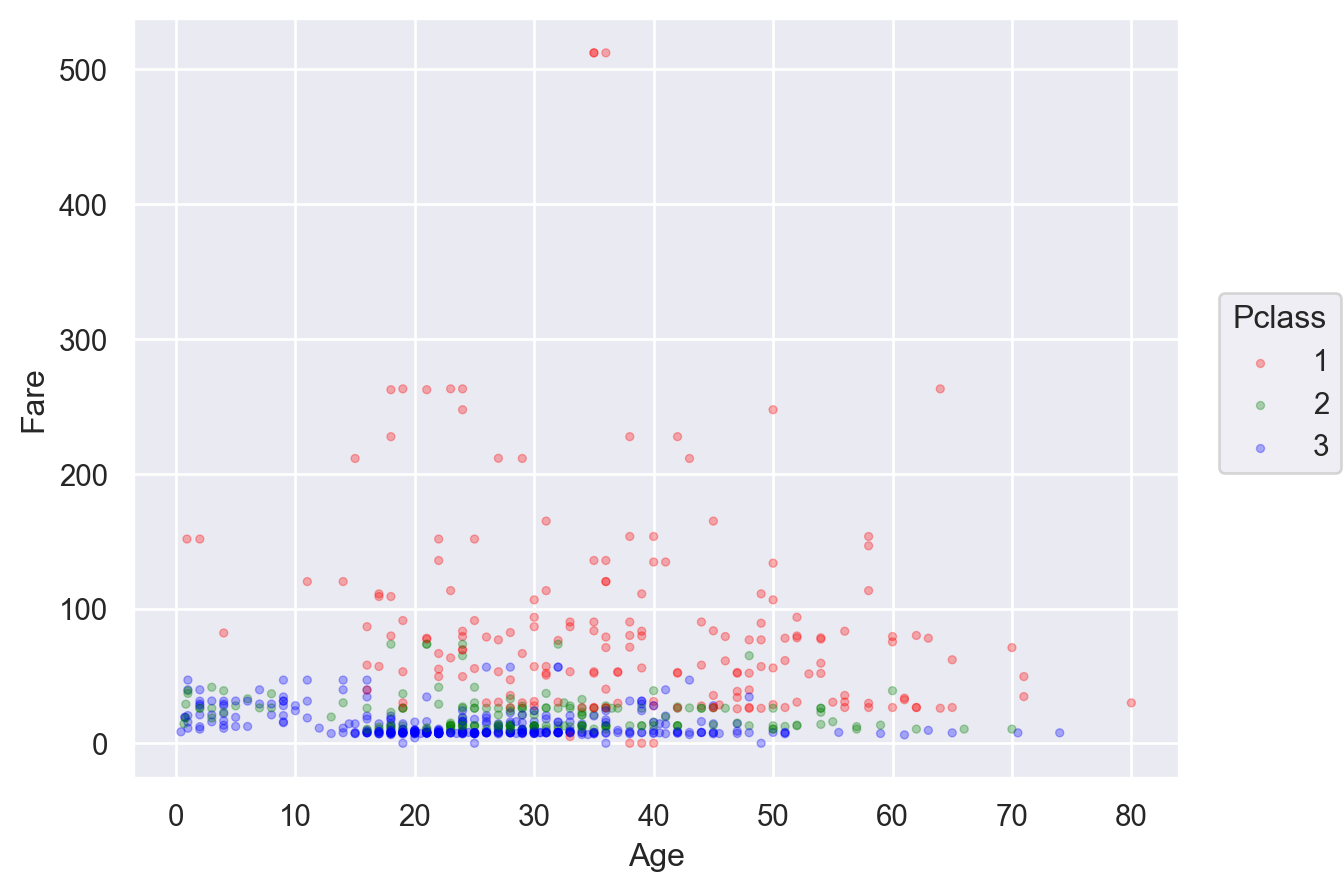

In [119]:
(
    so.Plot(data, x="Age", y="Fare", color="Pclass")
    .add(so.Dot(alpha=.3, pointsize=3))
    .scale(color=["red", "green", "blue"])
)

나이와 요금은 객실로 구분해봐도 별 상관 없어 보인다. <br>
나이에 따라 비용을 차등하지 않는구나.

#### 동반자

SibSp와 Parch를 합쳐서 총 인원에 따른 관계를 보자!
- 파생변수 Party 생성

In [127]:
data=data.assign(Party=lambda x:x.SibSp+x.Parch+1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Party
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S,1


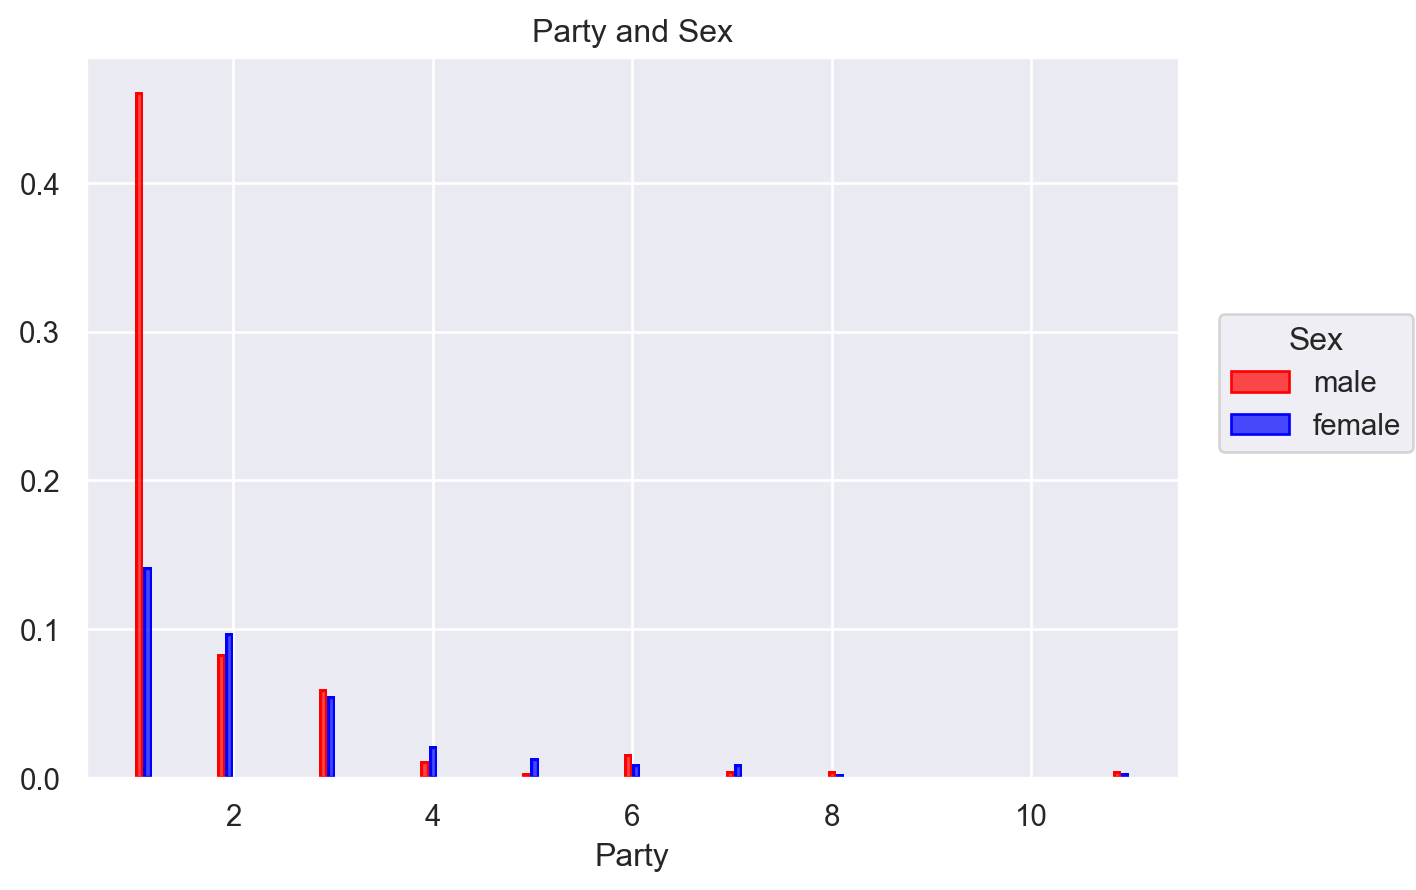

In [130]:
(
    so.Plot(data, x="Party", color="Sex")
    .add(so.Bar(), so.Hist("proportion"), so.Dodge())
    .scale(color=["red","blue"])
    .label(title="Party and Sex")
)

혼자 탑승한 승객은 남성이 압도적으로 많았다. 노동자계급으로 추정?
<br> 시대상을 고려하면 남성의 독단적인 사회활동이 자유로웠을수도 있다.
<br> 2명 이상이면 둘의 비율은 또이또이하다.

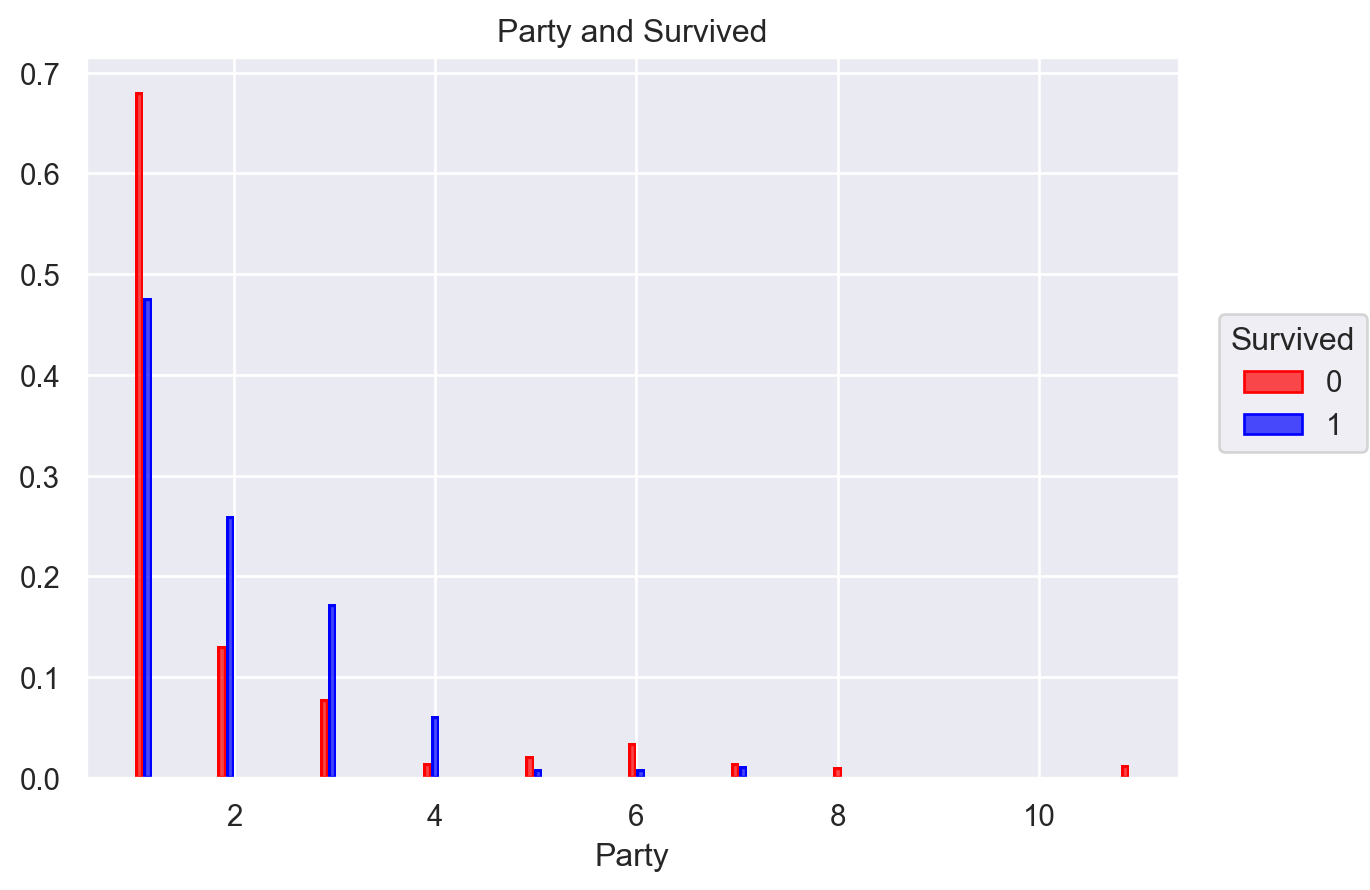

In [134]:
(
    so.Plot(data, x="Party", color="Survived")
    .add(so.Bar(), so.Hist("proportion", common_norm=False), so.Dodge())
    .scale(color=["red","blue"])
    .label(title="Party and Survived")
)

- 일행수가 적을수록 생존 비율이 근소하게 높다 (혼자인 경우 제외)
- 이벤트 개수를 제거하고 살펴보았더니 **(common_norm=False)**, 일행이 적을수록 생존, 사망률이 높아진다

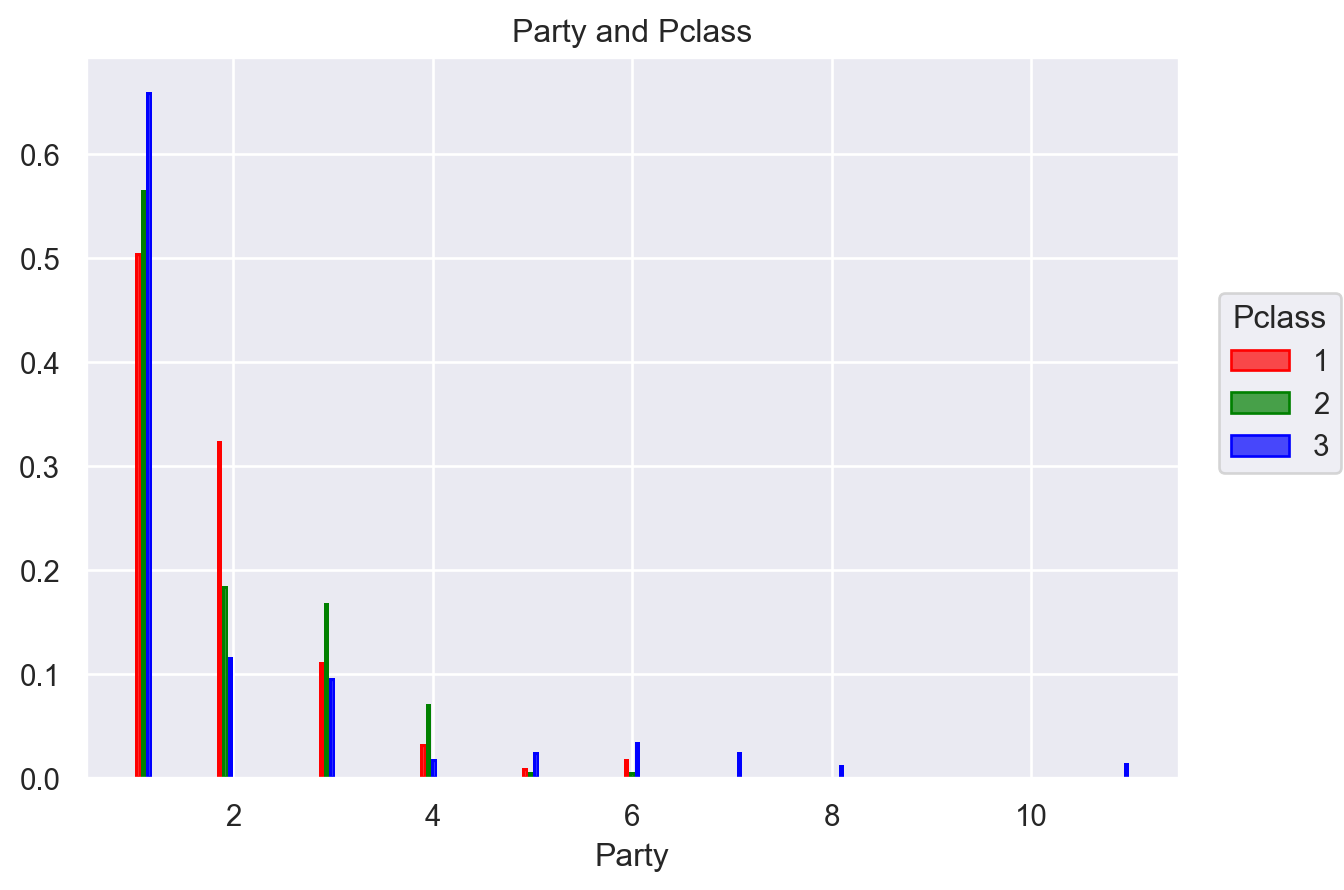

In [135]:
(
    so.Plot(data, x="Party", color="Pclass")
    .add(so.Bar(), so.Hist("proportion", common_norm=False), so.Dodge())
    .scale(color=["red", "green", "blue"])
    .label(title="Party and Pclass")
)

- **common_norm=False**
- 일행 수와 객실등급은 별 차이가 없는것 같다.